# NLTK: Python-библиотека для обработки естественного языка

### Введение

Обработка естественного языка (NLP - Natural Language Processing) - это одна из областей машинного обучения, граничащая с математической лингвистикой. NLP направлена на анализ реально существующих текстов: литературных произведений, научных статей, новостных сводок, юридических документов, текстов песен и т.д., причем вне зависимости от языка их написания. 

К практическим задачам NLP относятся:
- классификация текстов (по жанру, автору и т.д.),
- саммаризация (написание краткого содержания) текста,
- исправление опечаток в тексте,
- машинный перевод,
- диалоговые системы (Сири, Алиса, чат-боты для стандартных вопросов в банках, МФЦ и т.д.) и др.

NLTK (Natural Language ToolKit) - это одна из основных библиотек для NLP. Она содержит различные инструменты для многих задач обработки естечтвенного языка: от базовых до продвинутых. Чтобы познакомимся с данной библиотекой, мы пройдемся по ее основному функционалу и попробуем примениь его к различным текстам.

### Установка библиотеки

Прежде всего, библиотеку нужно установить и импортировать, и здесь никаких отличий от других библиотек нет.

In [1]:
!pip install nltk


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import nltk  

Однако отличия начинаются уже со следующего шага: NLTK предоставляет доступ к огромному набору из корпусов, моделей, пакетов и т.д., который необходимо скачать. После команды nltk.download() на экране появится диалоговое окно. В нем можно вручную выбрать пакеты или коллекции для скачивания, но проще всего скачать всё, выбрав "all" в столбце Identifier вкладки Collections. 

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

### Модули библиотеки

Если мы перейдем на страницу https://www.nltk.org/api/nltk.html, то увидим, что NLTK состоит из следующих пакетов:
* nltk.app (для интерактивных приложений)
* nltk.ccg (для комбинаторно-категориальной грамматики)
* nltk.chat (для простых чат-ботов)
* nltk.chunk (для деления текста на словосочетания заданного типа)
* nltk.classify (для классификации текстов)
* nltk.cluster (для кластеризации текстов)
* nltk.corpus (предоставляет доступ к корпусу текстов)
* nltk.draw (для визуализации зависимостей в текстах)
* nltk.inference (для доказательства теорем и построения моделей.)
* nltk.lm (для лингвистических моделей)
* nltk.metrics (содержит различные инструменты и метрики для оценки, например, расстояния между словами или веротяности встречи двух слов в одном осмсыленном контексте)
* nltk.misc (разнообразные инструменты для NLP)
* nltk.parse (для представления внутренней структуры текста в виде дерева)
* nltk.sem (содержит классы для представления семантической структуры с помощью логического аппарата)
* nltk.sentiment (для оценки эмоциональной окраски текстов)
* nltk.stem (для приведения слов к начальной форме)
* nltk.tag (для разметки частей речи слов в тексте)
* nltk.tbl (для transformation-based learning)
* nltk.tokenize (для разбиения текста на части-токены)
* nltk.tree (для визуализации иерархических зависимостей лингвистических конструкций)
* nltk.twitter (для работы с документами в виде твитов)

В этом докладе мы посмотрим на некоторые из данных пакетов.

### Корпус текстов

Чтобы обрабатывать естественный язык, нужно где-то взять тексты на этом языке. Чтобы пользователи не заморачивались с поиском текстов, NLTK предоставляет свой корпус текстов - это nltk.corpus. При этом часть текстов представлена в модуле nltk.book - для начала мы потренируемся на ней.

In [2]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


Как указано в подсказке выше, в nltk.book есть тексты и предложения. Вывести примеры текстов можно с помощью команды texts(), а примеры предложений - с помощью команды sents(). Посмотрим на оба типа объектов.

In [3]:
texts()

text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


Видим, что здесь представлены самые разнообразные тексты: и литературные произведения, и переписки, и Wall Streen Journal, и даже инагурационная речь. Какого типа все эти объекты?

In [4]:
print(f"Все тексты в модуле nltk.book имеют специальный тип {type(text3)}.")

Все тексты в модуле nltk.book имеют специальный тип <class 'nltk.text.Text'>.


Притом с этими текстами можно выполнять привычные нам действия для строк:

In [7]:
print(len(text3)) #Считать количество слов в тексте
print(len(set(text3))) #Считать количество уникальных слов
print(text3[5]) #Обращаться к слову по индексу
print(text3[10:20]) #Брать срез от одного слова до другого
print(text3.count("with")) #Считать, сколько раз слово входит в данный текст

44764
2789
the
['.', 'And', 'the', 'earth', 'was', 'without', 'form', ',', 'and', 'void']
289


Но, конечно же, есть и специфичные для данного типа объектов методы:

In [8]:
print(text3.name) #Вывести название текста

The Book of Genesis


In [9]:
text3.concordance("indeed") #Вывести части предложений (фактически, контекст), содержащих заданное слово

Displaying 8 of 8 matches:
arah thy wife shall bear thee a son indeed ; and thou shalt call his name Isa 
y me for my wife ' s sake . And yet indeed she is my sister ; she is the daugh
s brethren said to him , Shalt thou indeed reign over us ? or shalt thou indee
ndeed reign over us ? or shalt thou indeed have dominion over us ? And they ha
l I and thy mother and thy brethren indeed come to bow down ourselves to thee 
 , and bring me out of this hou For indeed I was stolen away out of the land o
 house , And said , O sir , we came indeed down at the first time to buy fo An
hich my lord drinketh , and whereby indeed he divineth ? ye have done evil in 


In [10]:
text2.similar("strong") #Вывести слова, которые близки по контексту к заданному

much great earnest well long so this far handsome happy lively anxious
dull stubborn the large they as constant which


In [11]:
text2.common_contexts(["glad", "happy"]) #Изучить общий контекст нескольких слов 
#(на выходе получаем словосочетания с пропусками, куда можно вставить любое из заданных слов)

very_to be_to so_to was_to


Когда мы имеем дело с десятками тысяч слов, подсчитывать частоту встречаемости с помощью метода count для каждого из них - долго и неоптимально. Вместо этого используем метод FreqDist, который принимает текст и выдает пары вида (слово/знак препинания, сколько раз оно встретилось в тексте). Чтобы вывести наиболее часто встречающиеся слова достаточно использовать метод most_common и в качестве параметра указать, сколько самых употребимых слов нужно вывести:

In [12]:
freq = nltk.FreqDist(text3)
print(freq.most_common(30))

[(',', 3681), ('and', 2428), ('the', 2411), ('of', 1358), ('.', 1315), ('And', 1250), ('his', 651), ('he', 648), ('to', 611), (';', 605), ('unto', 590), ('in', 588), ('that', 509), ('I', 484), ('said', 476), ('him', 387), ('a', 342), ('my', 325), ('was', 317), ('for', 297), ('it', 290), ('with', 289), ('me', 282), ('thou', 272), ("'", 268), ('is', 267), ('thy', 267), ('s', 263), ('thee', 257), ('be', 254)]


In [5]:
sents()

sent1: Call me Ishmael .
sent2: The family of Dashwood had long been settled in Sussex .
sent3: In the beginning God created the heaven and the earth .
sent4: Fellow - Citizens of the Senate and of the House of Representatives :
sent5: I have a problem with people PMing me to lol JOIN
sent6: SCENE 1 : [ wind ] [ clop clop clop ] KING ARTHUR : Whoa there !
sent7: Pierre Vinken , 61 years old , will join the board as a nonexecutive director Nov. 29 .
sent8: 25 SEXY MALE , seeks attrac older single lady , for discreet encounters .
sent9: THE suburb of Saffron Park lay on the sunset side of London , as red and ragged as a cloud of sunset .


Вывели список предложений. Какого типа все эти объекты?

In [14]:
print(f"Все предложения в модуле nltk.book тип {type(sent2)}, поэтому с ними можно выполнять все действия, что и с обычными списками.")

Все предложения в модуле nltk.book тип <class 'list'>, поэтому с ними можно выполнять все действия, что и с обычными списками.


Теперь возьмем какой-нибудь другой набор текстов, но уже из nltk.corpus - например, из набора текстов gutenberg.

In [16]:
from nltk.corpus import gutenberg 

In [17]:
print(gutenberg.fileids()) #Распечатаем названия файлов в этом наборе и посмотрим, какие тексты здесь есть
#О, тут есть "Алиса в стране чудес" Льюиса Кэролла! Выберем ее

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [18]:
#Чтобы получить текст, разделенный по словам и знакам препинания, используем метод words 
#и передаем в него название нужного произведения
tale_words=gutenberg.words('carroll-alice.txt')
print(tale_words) 

['[', 'Alice', "'", 's', 'Adventures', 'in', ...]


In [19]:
#По аналогии можно разбить текст по предложениям с помощью метода sents...
tale_sents=gutenberg.sents('carroll-alice.txt')
print(tale_sents)

[['[', 'Alice', "'", 's', 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']'], ['CHAPTER', 'I', '.'], ...]


In [20]:
#...или по абзацам с помощью метода paras
tale_paras=gutenberg.paras('carroll-alice.txt')
print(tale_paras)

[[['[', 'Alice', "'", 's', 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']']], [['CHAPTER', 'I', '.'], ['Down', 'the', 'Rabbit', '-', 'Hole']], ...]


К полученным объектам применимы методы списков: получение длины, обращение по индексу, "склеивание" в строку с помощью метода join и др.

In [21]:
print(f"В произведении 'Алиса в стране чудес' {len(tale_words)} слов и знаков препининия, {len(tale_sents)} предложений и {len(tale_paras)} абзацев.")
print('-'*30)
print(f"25-ое слово в произведении - это {tale_words[24]}.")
print('-'*30)
print(f"9-ое предложение книги гласит: {' '.join(tale_sents[8])}")
print('-'*30)
print(f"15-ый абзац начинается так: {' '.join(tale_paras[14][0])}")

В произведении 'Алиса в стране чудес' 34110 слов и знаков препининия, 1703 предложений и 817 абзацев.
------------------------------
25-ое слово в произведении - это get.
------------------------------
9-ое предложение книги гласит: ( when she thought it over afterwards , it occurred to her that she ought to have wondered at this , but at the time it all seemed quite natural ); but when the Rabbit actually TOOK A WATCH OUT OF ITS WAISTCOAT - POCKET , and looked at it , and then hurried on , Alice started to her feet , for it flashed across her mind that she had never before seen a rabbit with either a waistcoat - pocket , or a watch to take out of it , and burning with curiosity , she ran across the field after it , and fortunately was just in time to see it pop down a large rabbit - hole under the hedge .
------------------------------
15-ый абзац начинается так: Suddenly she came upon a little three - legged table , all made of solid glass ; there was nothing on it except a tiny gold

### Семантика, отношения между словами

В NLP мы так или иначе сталкиваемся с необходимостью проверить/узнать/сравнить значения слов, понять, какими отношениями связаны два слова - для этих целей NLTK предлагает модуль wordnet. С его помощью можно вывести определения слова, примеры его использования с контекстом, его синонимы, антонимы, гиперонимы, гипонимы, ассоциированные слова, узнать "близость" слов по разным метрикам и др.

In [7]:
from nltk.corpus import wordnet as wn

In [8]:
syns_take = wn.synsets("take")
print(syns_take) #Получили определения заданного слова во всевозможных частях речи, а также определения его синонимов
print('-'*30)
syns_take_verb = wn.synsets("take", pos=wn.VERB) #Также можем задать конкретную часть речи 
print(syns_take_verb)

[Synset('return.n.06'), Synset('take.n.02'), Synset('take.v.01'), Synset('take.v.02'), Synset('lead.v.01'), Synset('take.v.04'), Synset('assume.v.03'), Synset('take.v.06'), Synset('bring.v.01'), Synset('take.v.08'), Synset('take.v.09'), Synset('choose.v.01'), Synset('accept.v.02'), Synset('fill.v.04'), Synset('consider.v.03'), Synset('necessitate.v.01'), Synset('take.v.15'), Synset('film.v.01'), Synset('remove.v.01'), Synset('consume.v.02'), Synset('take.v.19'), Synset('take.v.20'), Synset('take.v.21'), Synset('assume.v.05'), Synset('accept.v.05'), Synset('take.v.24'), Synset('learn.v.04'), Synset('claim.v.05'), Synset('take.v.27'), Synset('aim.v.01'), Synset('take.v.29'), Synset('carry.v.02'), Synset('lease.v.04'), Synset('subscribe.v.05'), Synset('take.v.33'), Synset('take.v.34'), Synset('take.v.35'), Synset('claim.v.04'), Synset('accept.v.08'), Synset('contain.v.05'), Synset('take.v.39'), Synset('drive.v.16'), Synset('take.v.41'), Synset('contract.v.04')]
---------------------------

Полученные списки состоят из объектов типа synset - что за тип? Дословно SynSet=synonyms set - набор синонимов, имеющих одинаковое значение.

In [9]:
#Чтобы из объекта типа synset получить определяемое слово, мы извлекаем все леммы, ассоциированные с ним, 
#с помощью метода lemmas, затем берем первое из них - само слово, и извлекаем его из леммы с помощью метода name
print(f"Definitions of the verb {syns_take_verb[0].lemmas()[0].name().upper()}:")
print("1)", syns_take_verb[0].definition()) #С помощью метода definition выводим определение заданного слова в выбранном значении
print(f"Examples of usage: {', '.join(syns_take_verb[0].examples())}") #Метод examples выдает примеры использования
print("2)", syns_take_verb[1].definition())
print(f"Examples of usage: {'. '.join(syns_take_verb[1].examples())}")

Definitions of the verb TAKE:
1) carry out
Examples of usage: take action, take steps, take vengeance
2) require (time or space)
Examples of usage: It took three hours to get to work this morning. This event occupied a very short time


In [10]:
joy = wn.synset('joy.n.01') #Так по слову, части речи и его номеру в списке значений можно получить его synset
print(joy.lemmas()[0].antonyms()) #Вывели антонимы слова
print(joy.hypernyms()) #Вывели гиперонимы слова
print(joy.hyponyms()) #Вывели гипонимы слова

[Lemma('sorrow.n.01.sorrow')]
[Synset('emotion.n.01')]
[Synset('elation.n.02'), Synset('exhilaration.n.01'), Synset('exuberance.n.01'), Synset('exultation.n.01')]


Также NLTK предоставляет готовые метрики, чтобы узнать семантическую близость слов в разных аспектах.
Например, ипользуется метод path_similarity: он возвращает коэффициент семантической близости (от 0 до 1) двух слов, основанный на кратчайшем пути, соединяющем два слова в "is-a" классификации (в этой классификации слова связываются отношениями гипероним/гипоним, подобно графу, и уже в нем находится кратчайший путь между 2 заданными словами). Чем меньше коэффициент близости слов, чем дальше они друг от друга семантически. Соответственно, коэффициент близости 1 получается от применения данного метода для одного и того же слова.

In [13]:
school = wn.synset('school.n.01')
university = wn.synset('university.n.01')
sim1= school.path_similarity(university)
print(sim1)

0.14285714285714285


Также есть метод lch_similarity (Leacock-Chodorow Similarity): он возвращает коэффициент семантической близости 2 слов, основанный на длине кратчайшего пути (как в прерыдущем методе, обозначим p) и максимальной глубине классификации для данного слова (обозначим d). Тогда возвращаемое значение рассчитывается как -log(p/(2d)).

In [14]:
sim2=school.lch_similarity(university)
print(sim2)

1.6916760106710724


Наконец, еще есть метод wup_similarity (Wu-Palmer Similarity): он возвращает коэффициент семантической близости 2 слов, основанный на глубине классификации двух слов и их наиболее точного общего "предка".

In [15]:
sim3=school.wup_similarity(university)
print(sim3)

0.5714285714285714


### Tokenization

Когда мы работали с корпусом, мы легко делили текст по словам, предложениям или абзацам с помощью соответствуюшего метода, и это было удобно. Но что если мы работаем с текстом не из корпуса, а с каким-то иным документом извне? Тогда можно воспользоваться токенизаторами.

В NLP токен - это некоторый фрагмент текста, обычно слово или предложение. Соответственно, текст можно токенизировать по словам или предложениям (в зависимости от цели). Модуль nltk.tokenize предоставляет несколько готовых токенизаторов. Рассмотрим работу некоторых из них на одном и том же тексте, который специально "подпортим" лишними пробелами, небуквенными и непунктуационными символами, датами, числами и т.д.

[Чтобы понимать, как токенизатор разделил текст по словам, будем использовать символ '/']

In [30]:
from nltk.tokenize import sent_tokenize, word_tokenize, MWETokenizer, punkt, TweetTokenizer
text='''  
    Today is   2023-11-20, and it's finally snowing well in Europe! December's coming; I feel  these #Happy_New_Year vibes in the air ;> 
  Holidays in 5.5 weeks!
I wish I  could now <<drink    hot chocolate>>  and <   <go skating>>, but 100% of students in my uni  finish studies just on the New Year Eve :( Whyyy??? Nasty thing...
 Mrs. Smith and Lady Jane have invited me to go  shopping for #Christmas gifts at around 5 p.m., and I'd     really love to go  , but idk when. 
'''

Токенизаторы word_tokenize и TweetTokenize делят текст по словам. Видим, что word_tokenize работает довольно прямолинейно, а TweetTokenize более аккуратно: в отличие от первого, второй видит хэштеги, объединенные нижними подечеркиваниями слова и смайлики, не отделяет сокращенный глагол (типа 's) от подлежащего. Притом оба токенизатора справились с лишними пробелами в тексте.

In [33]:
print("Токенизация с помощью word_tokenize".upper())
print('/ '.join(word_tokenize(text)))
print('-'*50)
print("Токенизация с помощью TweetTokenizer".upper())
tweet_tokenize = TweetTokenizer()
print('/ '.join(tweet_tokenize.tokenize(text)))

ТОКЕНИЗАЦИЯ С ПОМОЩЬЮ WORD_TOKENIZE
Today/ is/ 2023-11-20/ ,/ and/ it/ 's/ finally/ snowing/ well/ in/ Europe/ !/ December/ 's/ coming/ ;/ I/ feel/ these/ #/ Happy_New_Year/ vibes/ in/ the/ air/ ;/ >/ Holidays/ in/ 5.5/ weeks/ !/ I/ wish/ I/ could/ now/ </ </ drink/ hot/ chocolate/ >/ >/ and/ </ </ go/ skating/ >/ >/ ,/ but/ 100/ %/ of/ students/ in/ my/ uni/ finish/ studies/ just/ on/ the/ New/ Year/ Eve/ :/ (/ Whyyy/ ?/ ?/ ?/ Nasty/ thing/ .../ Mrs./ Smith/ and/ Lady/ Jane/ have/ invited/ me/ to/ go/ shopping/ for/ #/ Christmas/ gifts/ at/ around/ 5/ p.m./ ,/ and/ I/ 'd/ really/ love/ to/ go/ ,/ but/ idk/ when/ .
--------------------------------------------------
ТОКЕНИЗАЦИЯ С ПОМОЩЬЮ TWEETTOKENIZER
Today/ is/ 2023-11-/ 20/ ,/ and/ it's/ finally/ snowing/ well/ in/ Europe/ !/ December's/ coming/ ;/ I/ feel/ these/ #Happy_New_Year/ vibes/ in/ the/ air/ ;/ >/ Holidays/ in/ 5.5/ weeks/ !/ I/ wish/ I/ could/ now/ </ </ drink/ hot/ chocolate/ >/ >/ and/ </ </ go/ skating/ >/ >/ ,/ but/ 10

Отличительная черта word_tokenize - это возможность получить список токенов с указанием части речи для каждого из них. Для этого используется метод pos_tag, причем есть несколько способов разметки частей речи (universal, wjs, brown - они отличаются полнотой и детальностью описания различных частей речи).

In [34]:
sent7 = word_tokenize("Mrs. Smith and Lady Jane have invited me to go shopping for Christmas gifts at around 5 p.m., and I'd really love to go, but idk when.")
uni_sent7 = nltk.pos_tag(sent7, tagset='universal') 
def_sent7 = nltk.pos_tag(sent7) 
print('Universal - Default')
print('-'*30)
for i in range(len(uni_sent7)):
    print(f"{uni_sent7[i]} - {def_sent7[i]}")

Universal - Default
------------------------------
('Mrs.', 'NOUN') - ('Mrs.', 'NNP')
('Smith', 'NOUN') - ('Smith', 'NNP')
('and', 'CONJ') - ('and', 'CC')
('Lady', 'NOUN') - ('Lady', 'NNP')
('Jane', 'NOUN') - ('Jane', 'NNP')
('have', 'VERB') - ('have', 'VBP')
('invited', 'VERB') - ('invited', 'VBN')
('me', 'PRON') - ('me', 'PRP')
('to', 'PRT') - ('to', 'TO')
('go', 'VERB') - ('go', 'VB')
('shopping', 'NOUN') - ('shopping', 'NN')
('for', 'ADP') - ('for', 'IN')
('Christmas', 'NOUN') - ('Christmas', 'NNP')
('gifts', 'NOUN') - ('gifts', 'NNS')
('at', 'ADP') - ('at', 'IN')
('around', 'ADP') - ('around', 'IN')
('5', 'NUM') - ('5', 'CD')
('p.m.', 'NOUN') - ('p.m.', 'NN')
(',', '.') - (',', ',')
('and', 'CONJ') - ('and', 'CC')
('I', 'PRON') - ('I', 'PRP')
("'d", 'VERB') - ("'d", 'MD')
('really', 'ADV') - ('really', 'RB')
('love', 'VERB') - ('love', 'VB')
('to', 'PRT') - ('to', 'TO')
('go', 'VERB') - ('go', 'VB')
(',', '.') - (',', ',')
('but', 'CONJ') - ('but', 'CC')
('idk', 'NOUN') - ('idk', 

Видим, что данная разметка также учитывает сокращения, имена собственные, числа, знаки препинания и даже распознает сокращенные формы глаголов как глаголы ('d). Также дефолтный tagset оказался более детальным и разборчивым, чем universal tagset.

Теперь рассмотрим токенизаторы, делящие текст на предложения - например, sentence_tokenize и punkt.

In [35]:
print("Токенизация с помощью sent_tokenize".upper())
res_sent=sent_tokenize(text)
for i in range(len(res_sent)):
    print(f"{i+1}) {res_sent[i]}")
print('-'*40)    
print("Токенизация с помощью punkt".upper())      
punkt_tokenize = nltk.data.load('tokenizers/punkt/english.pickle')
res_punkt=punkt_tokenize.tokenize(text)
for i in range(len(res_punkt)):
    print(f"{i+1}) {res_punkt[i]}")

ТОКЕНИЗАЦИЯ С ПОМОЩЬЮ SENT_TOKENIZE
1)   
    Today is   2023-11-20, and it's finally snowing well in Europe!
2) December's coming; I feel  these #Happy_New_Year vibes in the air ;> 
  Holidays in 5.5 weeks!
3) I wish I  could now <<drink    hot chocolate>>  and <   <go skating>>, but 100% of students in my uni  finish studies just on the New Year Eve :( Whyyy???
4) Nasty thing...
 Mrs. Smith and Lady Jane have invited me to go  shopping for #Christmas gifts at around 5 p.m., and I'd     really love to go  , but idk when.
----------------------------------------
ТОКЕНИЗАЦИЯ С ПОМОЩЬЮ PUNKT
1)   
    Today is   2023-11-20, and it's finally snowing well in Europe!
2) December's coming; I feel  these #Happy_New_Year vibes in the air ;> 
  Holidays in 5.5 weeks!
3) I wish I  could now <<drink    hot chocolate>>  and <   <go skating>>, but 100% of students in my uni  finish studies just on the New Year Eve :( Whyyy???
4) Nasty thing...
 Mrs. Smith and Lady Jane have invited me to go  shoppi

Видим, что два токенизатора разбили данный текст на предложения одинаково. Более того, оба токенизатора не обрабатывают случай, когда предложение заканчивается смайликом или многоточием.

### Chunking, chinking, named entities

Chunking - это деление предложений на словосочетния, фразы. Эта процедура может быть полезна для уточнения контекста, который обуславливает значение слова и его отношения с окружающими его словами. Когда мы осуществляем chunking, мы указываем грамматические структуры, которые хотим включить в итоговые фразы. Для этого мы в явном виде прописываем эти структуры с помощью регулярных выражений (regex).

В примере ниже будет использоваться structure1 = "NP: {\<JJ>\<NN>}". Это регулярное выражение предполагает конструкцию "прилагательное (\<JJ>)-существительное (\<NN>)". Здесь для указания частей речи используются те же индексы, что и в дефолтном tagset из предыдущего блока. 

Chinking - это тоже деление предложений на словосочетания, однако здесь мы указываем структуры, которые хотели бы исключить из итоговых фраз.
    
В примере ниже будет использоваться

structure2 = '''

NP: {<.*>+}

}\<VBD>{  '''

Сначала мы включаем любой контекст с помощью обычных фигурных скобок ({<.*>+}), а затем используем вывернутые фигурные скобки, чтобы показать, что хотим исключить глаголы в прошедшем времени (}\<VBD>{).

NP в начале расмматриваемых выражений - это некий маркер начала регулярного выражения.

In [36]:
text2_abst = text2[30:100] #Берем отрывок из 2 текста из nltk.book
tagged_text2_abst = nltk.pos_tag(text2_abst) #Размечаем слова текста частями речи
structure1 = "NP: {<JJ><NN>}" #Определяем грамматиеские структуры для chunking и chinking
structure2 = '''
NP: {<.*>+}
}<VBD>{  '''

#Задаем фунцкии, которые будут разбивать предложения по заданным структурам
chunk_parser1 = nltk.RegexpParser(structure1)
chunk_parser2 = nltk.RegexpParser(structure2)

In [37]:
#Рисуем деревья для двух получившихся групп фраз
tree1 = chunk_parser1.parse(tagged_text2_abst)
tree1.draw()

#В открывшемся диалоговом окне видим дерево, представляющее рассматриваемый текст, где выделены наденные словосочетания: 
#good opinion, surrounding acquaintance, late owner, single man, advanced age, constant companion

In [38]:
tree2 = chunk_parser2.parse(tagged_text2_abst)
tree2.draw()

#В открывшемся диалоговом окне видим более многоуровневое дерево, представляющее рассматриваемый текст
#Теперь в нем выделены все глаголы в прошедшем времени и части предложения, которые эти глаголы соединяют между собой.

Также важно распознавать в тексте так называемые named entities (именованные сущности). Это могут быть имена собственные (люди, организации, географические объекты и т.д.), время, даты, деньги, проценты и др. Распознавание именованных сущностей нужно, например, чтобы отличать apple и Apple, guardian и Guardian и т.д., ведь это может кардинально поменять смысл предложения. Для такого распознавания используется ne_chunker.

In [40]:
news="The UN General Assembly under the guidance of Antonio Guterres will convene three High-Level Meetings on health during its 78th session in New York in September 2023." 
tagged_news = nltk.pos_tag(list(x.strip() for x in news.split()))
tree3 = nltk.ne_chunk(tagged_news)
tree3.draw()

#Видим, что было распознано 3 именованных сущности: организация (UN), человек (Antonio Guterres) и город (New York)

### Неинформативные слова и знаки препинания

В большинстве предложений любого языка содержатся знаки препинания и неинформативные слова: служебные части речи (союзы, предлоги, частицы), местоимения, модальные глаголы и тд. Они нужны для связи слов в предложении и не несут в себе его ключевой смысл. Когда мы рассматривали метод FreqDist, мы вывели 30 наиболее часто встречающихся слов в text3, и почти все объекты в этом списке были знаками пунктуации или неинформативными словами. Соответственно, чтобы работать только со смыслообразующими словами, нам нужно удалить из текста все то, что не несет особого значения. 

Для удобства библиотека NLTK предоставляет список неинформативных слов (обычно они называются stopwords), а в модуле string есть список знаков препинания - их можно легко найти и удалить из текста.

In [41]:
from string import punctuation 
from nltk.corpus import stopwords

print(f"Вот все знаки препинания, которые могут встретиться в тексте: {' '.join(punctuation)}")
print('-'*30)
#Очевидно, в каждом языке свои stopwords; мы работаем с английскими текстами, поэтому явно указываем язык в методе
no_inf = stopwords.words('english')  
print(f"Вот все stopwords для англйского языка: {', '.join(no_inf)}")

Вот все знаки препинания, которые могут встретиться в тексте: ! " # $ % & ' ( ) * + , - . / : ; < = > ? @ [ \ ] ^ _ ` { | } ~
------------------------------
Вот все stopwords для англйского языка: i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should,

Теперь проведем эксперимент: сравним длину исходного текста, текста без знаков препинания и текста без знаков препинания и стопслов.

In [43]:
no_punct = [word for word in text3 if word not in punctuation] 
no_stopwords = [word for word in no_punct if word not in no_inf] 
print(f"Длина всего текста равна {len(text3)}; длина текста без пунктуации равна {len(no_punct)}; длина текста без пунктуации и стоп-слов равна {len(no_stopwords)}.")
print(f"Тогда процент пунктуации в тексте равен {round((1-len(no_punct)/len(text3))*100, 2)}, процент пунктуации и стопслов равен {round((1-len(no_stopwords)/len(text3))*100, 2)}")

Длина всего текста равна 44764; длина текста без пунктуации равна 38499; длина текста без пунктуации и стоп-слов равна 20587.
Тогда процент пунктуации в тексте равен 14.0, процент пунктуации и стопслов равен 54.01


Видим, что неинформативные слова и знаки препинания составляют более половины данного текста. Значит, убрав их, мы примерно вдвое сократим объем данных для дальнешего анализа - круто!

### Коллокации и н-граммы 

Помимо разбиения текста по словам и предложениям, иногда удобно работать с устойчивыми, часто встречающимися словосочетаниями - коллокациями. Чтобы получить список коллокаций в тексте, достаточно применить к нему одномменный метод:

In [44]:
text3.collocations()

said unto; pray thee; thou shalt; thou hast; thy seed; years old;
spake unto; thou art; LORD God; every living; God hath; begat sons;
seven years; shalt thou; little ones; living creature; creeping thing;
savoury meat; thirty years; every beast


Однако некоторые коллокации могли быть упущены из-за измененных форм слова. Давайте это исправим, приведя слова к начальной форме с помощью лемматизации (о ней будет подробно рассказано в последующих разделах). Мы заметим, что наборы коллокаций действительно поменялись: после лемматизации одна и та же коллокация в разных числах/временах/и т.д. была приведена к единой форме, из-за чего частота вхождения некоторых устойчивых фраз возросла, и они "поднялись в общем рейтинге" коллокаций.

In [45]:
from nltk.stem import WordNetLemmatizer
get_lemma = WordNetLemmatizer()
text3_lemmatized = [get_lemma.lemmatize(x) for x in text3] #Меняем каждое слово на его лемму - универсальную начальную форму
text3_lemmatized_new = nltk.Text(text3_lemmatized) #Меняем тип объекта на Text, т.к. у него есть метод collocations
text3_lemmatized_new.collocations()

said unto; pray thee; thou shalt; thou hast; thy seed; spake unto;
year old; thou art; LORD God; thy servant; every living; God hath;
creeping thing; seven year; shalt thou; thy brother; living creature;
savoury meat; burnt offering; ill favoured


Иногда в NLP удобно разбивать текст на словосочетания с фиксированным количеством слов - так называемые н-граммы. Так, биграммы - словосочетания из 2 подряд идущих слов, триграммы - из 3, квадрограммы - из 4 и т.д. NLTK предоставляет удобный инструмент и для такого разбиения текстов: методы BigramCollocationFinder, TrigramCollocationFinder, QuadgramsCollocationFinder в модуле collocations.

In [47]:
#Чтобы не получать н-граммы со знаками препинания вроде ", or", ". However", "and now", "And now"
#лучше использовать текст, очищенный от пунктуации и приведенный к единому регистру.
no_punct = [word.lower() for word in text3 if word not in punctuation] 

find2 = nltk.collocations.BigramCollocationFinder.from_words(no_punct) #Делим текст на биграммы
find2.ngram_fd.most_common(10) #Выводим 10 самых часты биграмм

[(('of', 'the'), 373),
 (('and', 'the'), 359),
 (('and', 'he'), 338),
 (('in', 'the'), 296),
 (('said', 'unto'), 179),
 (('the', 'lord'), 160),
 (('the', 'land'), 157),
 (('and', 'they'), 144),
 (('he', 'said'), 115),
 (('all', 'the'), 110)]

In [48]:
find3 = nltk.collocations.TrigramCollocationFinder.from_words(no_punct) #Делим текст на триграммы
find3.ngram_fd.most_common(10) #Выводим 10 самых часты триграмм

[(('the', 'land', 'of'), 102),
 (('and', 'he', 'said'), 100),
 (('the', 'sons', 'of'), 74),
 (('in', 'the', 'land'), 68),
 (('it', 'came', 'to'), 63),
 (('came', 'to', 'pass'), 63),
 (('and', 'it', 'came'), 62),
 (('the', 'earth', 'and'), 52),
 (('and', 'the', 'lord'), 46),
 (('and', 'i', 'will'), 46)]

In [49]:
find4 = nltk.collocations.QuadgramCollocationFinder.from_words(no_punct) #Делим текст на квадрограммы
find4.ngram_fd.most_common(10) #Выводим 10 самых часты квадрограмм

[(('it', 'came', 'to', 'pass'), 63),
 (('and', 'it', 'came', 'to'), 62),
 (('in', 'the', 'land', 'of'), 53),
 (('the', 'land', 'of', 'egypt'), 34),
 (('the', 'land', 'of', 'canaan'), 32),
 (('and', 'the', 'sons', 'of'), 29),
 (('the', 'name', 'of', 'the'), 22),
 (('came', 'to', 'pass', 'when'), 22),
 (('and', 'he', 'said', 'unto'), 20),
 (('land', 'of', 'canaan', 'and'), 18)]

### Визуализация

Казалось бы, NLTK - библиотека для работы с текстом, и графических представлений тут особо не построишь... Одако это не так: для обработки естественного языка графики бывают очень полезны. 

Например, метод dispersion_plot строит по заданному набору слов расположение каждого из них в тексте. По горизонтальной оси мы видим количесиво слов в тексте, а по вертикальной - все заданные слова. Вхождение слова в текст обозначается вертикальной засечкой: если продолжить ее до пересечения  горизонтальной осью, то получим примерный индекс слова в тексте. Чем больше засечек, тем чаще слово встречается в тексте.

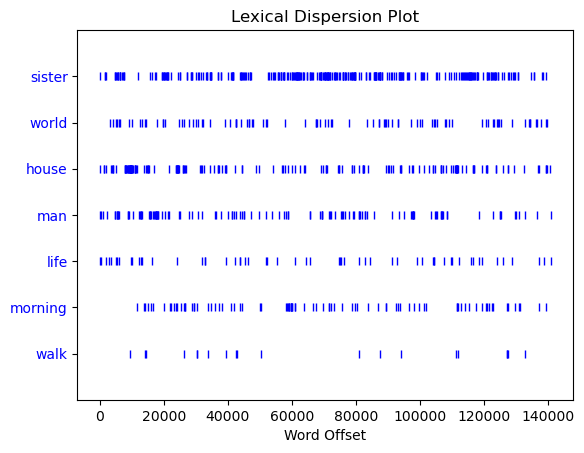

In [50]:
text2.dispersion_plot(["sister", "world", "house", "man", "life", "morning", "walk"])

А с помощью методов plot и FreqDist можно построить линейные графики: кумулятивный и обычный. Для каждого из выбранных слов они показывают, сколько раз оно встретилось в тексте суммарно.

In [52]:
conceptual_words=[x.lower() for x in text2 if not (x in no_inf or x in punctuation)]
conceptual_words=FreqDist(conceptual_words)

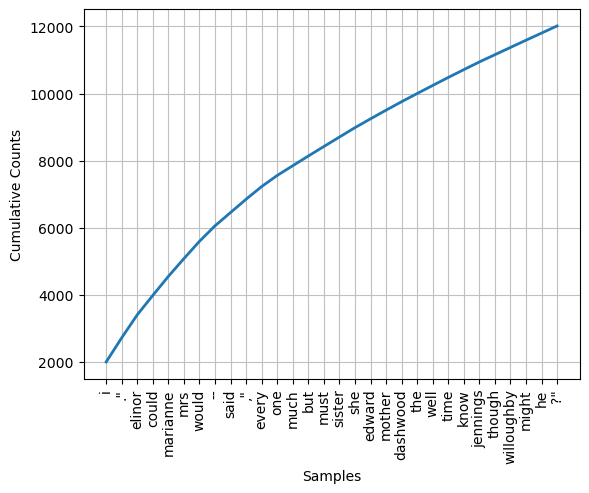

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [56]:
conceptual_words.plot(30, cumulative=True) #Явно указываем количество слов, для которых строим график, и тип графика

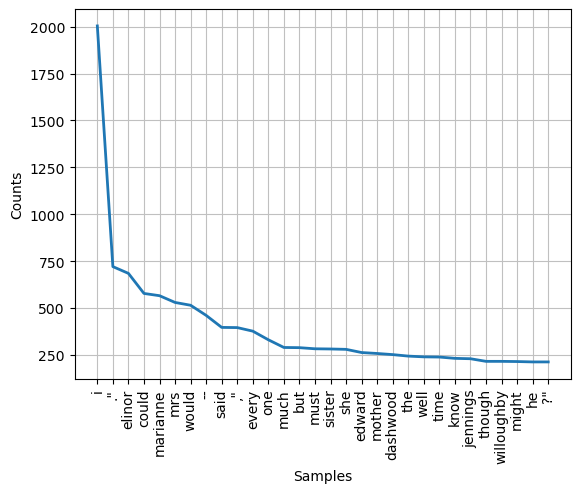

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [57]:
conceptual_words.plot(30)

### Приведение слов к "начальной" форме: стемминг и лемматизация

Пунктуация и стоп-слова - это еще полбеды: в разных языках существительные изменяются по падежам и числам, прилагательные - по числам и родам, глаголы - по лицам, родам и временам... Все эти различные формы слова несут один и тот же смысл, поэтому удобно привести их всех к некоторой единой одной форме - назовем ее "начальной".

Для этого есть вда основных подхода - это стемминг и лемматизация. Стемминг заключается в нахождении основы слова (она не всегда совпадает с корнем слова). Стемминг - это более грубый процесс, который отсекает от слова целые морфемы, что иногда приводит к утрате смысла слова. [Например, есть алгоритмы отсечения окончаний, которые гласят: если слова заканчивается на ing/ed/ly, то это окончание и его нужно удалить. Но как быть со словами sing, bed, fly? Отсечение этих буквосочетаний уничтожит их смысл.]

Лематизация заключается в приведении слова к его словарной форме. Лемматизация ссылается на словарные статьи, учитывает морфологические особенности и зачастую выдает более точную и полнозначную "начальную" форму слова.

Инструменты для стемминга и лемматизации находятся в модуле nltk.stem. 

Три основных стеммера - это Porter stemmer, Snowball syemmer, Lancaster stemmer. Первые два придуманы М.Ф. Портером (Snowball stemmer - это улучшенный Porter stemmer), второй - в университете Ланкастер. Porter stemmer и Lancaster stemmer поддерживают только английский язык, а Snowball stemmer - еще арабский, датский, немецкий, французский, итальянский и др. Lancaster stemmer наиболее "аггрессивный" и зачастую удаляет нужные части слова. 

Посмотрим на работу всех трех стеммеров на одном и том же наборе слов в разнообразных формах.

In [60]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
porter = PorterStemmer()
snowball=SnowballStemmer(language='english')
lancaster=LancasterStemmer()

wordlist=['being', 'abaci', 'rocks', 'corpora', 'better', 'churches', 'mice', 'do', 'phones', 'busy', 'are', 'Japanese', 'very', 'peace', 'thought', 'does', 'says', 'photoes', 'played', 'pieces']

#words = ['is', 'are', 'bought', 'buys', 'giving', 'jumps', 'jumped', 'birds', 'do', 'does', 'did', 'doing']
print('Word - Porter - Snowball - Lancaster')
print('-'*40)
for x in wordlist:
    print(f"{x} - {porter.stem(x)} - {snowball.stem(x)} - {lancaster.stem(x)}")

Word - Porter - Snowball - Lancaster
----------------------------------------
being - be - be - being
abaci - abaci - abaci - abac
rocks - rock - rock - rock
corpora - corpora - corpora - corpor
better - better - better - bet
churches - church - church - church
mice - mice - mice - mic
do - do - do - do
phones - phone - phone - phon
busy - busi - busi - busy
are - are - are - ar
Japanese - japanes - japanes - japanes
very - veri - veri - very
peace - peac - peac - peac
thought - thought - thought - thought
does - doe - doe - doe
says - say - say - say
photoes - photo - photo - photo
played - play - play - play
pieces - piec - piec - piec


Видим, что стемминг в целом справляется со своей задачей, однако иногда "откусывает" нужные, несущие смысл части слов (особенно это видно по работе Lancaster stemmer). Теперь для того же набора слов проведем лемматизацию и сравним результаты.

Заметим, что для повышения качества лемматизации дополнительно можно указывать часть речи слова с помощью строкового параметра pos в методе lemmatize.

In [61]:
from nltk.stem import WordNetLemmatizer
get_lemma = WordNetLemmatizer()
wordlist=['being', 'abaci', 'rocks', 'corpora', 'better', 'churches', 'mice', 'do', 'phones', 'busy', 'are', 'Japanese', 'very', 'peace', 'thought', 'does', 'says', 'photoes', 'played', 'pieces']
print('Word - Lemmatization result')
print('-'*30)
for x in wordlist:
    print(f"{x} - {get_lemma.lemmatize(x)}")

Word - Lemmatization result
------------------------------
being - being
abaci - abacus
rocks - rock
corpora - corpus
better - better
churches - church
mice - mouse
do - do
phones - phone
busy - busy
are - are
Japanese - Japanese
very - very
peace - peace
thought - thought
does - doe
says - say
photoes - photoes
played - played
pieces - piece


Итак, лемматизация - это действительно более тонкий инструмент, который учитывает часть речи и заметно точнее указывает начальную форму слова.

### Векторизация

Наконец, мы переходим к более интересным вещам. Вот мы загрузили свой документ или взяли готовый из корпуса, посчитали количество слов и частоту их встречаемости, поделили текст на токены, почистили от лишних слов и символов, привели к начальной форме... И что? Как компьютер поймет его смысл? Как сгенерирует наилучший ответ на основе вопроса пользователя? Как сделает вывод о типе и тематике текста?

Очевидно, компьютер не "понимает" значение текстов в том смсыле, в котором их понимает человек. Компьютер же ориентируется на численные показатели семантической близости текстов. Но чтобы из текста каким-то волшебным образом получить числа, слова в нем нужно векторизовать.

Один из часто используемых методов векторизации - это Word2Vec (здесь надо сделать оговорку, что этот инструмент придажлежит библиотеке gensim, а не NLTK; однако представление текста в векторной форме важно для изучения следующих разделов библиотеки NLTK, поэтому мы посмотрим на него тоже).

Вообще говоря, Word2Vec - это название целого набора моделей, использующих нейронные сети для контекстного анализа слов в документе. Word2Vec из gensim принимает в качестве параметра некоторый текст и сопоставляет каждому (уникальному) слову свой вектор в векторном пространстве, опираясь на следующее правило: чем чаще слова встречаются в одном и том же контексте в документе, тем ближе должны быть их итоговые векторы.

Векторизованные слова обычно называют эмбеддингами. Также векторизовать можно целые документы - например, с помощью Doc2Vec.

In [62]:
from gensim.models import Word2Vec
alice_w2v = Word2Vec(gutenberg.sents('carroll-alice.txt'))
print("Мы можем увидеть вектор, который был сопоставлен любому слову в тексте - например, слову THOUGHT:")
print(alice_w2v.wv["thought"])
print('-'*30)
print("Также мы можем увидеть слова, которые встречаются в одном контексте с данным словом чаще всего.")
print("Значения, идущие в парах после слов - это косинусы углов между соответствующими парами векторизованных слов.")
print(alice_w2v.wv.most_similar('thought', topn=10))

Мы можем увидеть вектор, который был сопоставлен любому слову в тексте - например, слову THOUGHT:
[-0.12401176  0.34205142  0.02047736  0.01460694  0.1305043  -0.38757122
  0.19528039  0.43390396 -0.22567241 -0.16239616 -0.10096042 -0.34524623
 -0.04676763  0.05046663  0.00668189 -0.00626312 -0.05355979 -0.20696382
 -0.09548388 -0.4313899   0.14531171  0.2807315   0.08030538 -0.21597596
  0.07163231 -0.00278536 -0.07979615 -0.19383514 -0.1511012  -0.11449516
  0.1915908   0.06024997  0.12155108 -0.23146693 -0.2143387   0.42194813
  0.19666362 -0.03826691 -0.09244616 -0.4178354  -0.00436224 -0.22180724
 -0.19484134 -0.02971346  0.2719413  -0.18199843 -0.32540962 -0.09272275
  0.05642148  0.04309639  0.06941379 -0.07967489 -0.08207686 -0.00418801
 -0.10253427 -0.04615429  0.03005918 -0.22369868 -0.2647439   0.0782177
  0.14708376  0.02586345  0.09983345 -0.1560923  -0.15316501  0.09959264
 -0.00844824  0.31614238 -0.4228098   0.12171629 -0.20205714  0.344029
  0.21436359 -0.00539999  0.3

### Кластеризация

Кластеризация в общем смысле этого слова - это разбиение некоторого множества объектов на группы (кластеры) по определенному признаку так, чтобы все объекты одной группы были максимально близки друг с другом по данному признаку. Учитывая, что мы умеем векторизовать слова и тексты, кластеризация без проблем осуществляется с помощью математических (а не чисто лингвистических) средств.

Один из способов кластеризации - это кластеризация К-средних (K-means clustering). При таком подходе алгоритм начинается с выбора К произвольных средних (они еще называются центроидами), затем каждый вектор определяется в группу с наиболее близким средним. Далее, исходя из фактических групп векторов, средние пересчитываются, и векторы могут перегруппироваться. Алгоритм продолжается до тех пор, пока группы векторов не станут стабильными (неизменными). [Альтернативно можно не указывать изначальные центроиды, а указать количество повторений алгоритма, и функция сама рассчитает средние.]

Рассмотрим числовой двумерный пример, чтобы мы легко могли нарисовать итоговые кластеры на плоскости.

In [63]:
from nltk.cluster import KMeansClusterer, euclidean_distance, cosine_distance
import numpy as np
import matplotlib.pyplot as plt

nums=[-1, -1, 9, 4, -1, 6, 12, 6, -2, -2, -2, 3, -3, -3, 11, 2, 3, -4]
init_vecs=[]
for i in range(len(nums)//2):
    init_vecs.append(np.array([nums[2*i], nums[2*i+1]]))

centers=[[11, 4], [-2, -2], [-2, 5]]

#Создаем кластеризатор: задаем желаемое количесиво кластеров, метрику (евклидово расстояние или косинусное расстояние), 
#вектор изначальных центроидов (или количество повторений)
kmeans_clust1 = KMeansClusterer(3, euclidean_distance, initial_means=centers, avoid_empty_clusters=True)
result1 = kmeans_clust1.cluster(init_vecs, True, trace=True)
fin_means1=kmeans_clust1.means()

print('-'*50)
print("Полученное разбиеие векторов по кластерам:")
division1=[[], [], []]
for i in range(len(init_vecs)):
    division1[result1[i]].append(init_vecs[i])
for i in range(3):
    print(f"Векторы {division1[i]} были определены в кластер {i} со средним {fin_means1[i]}")

k-means trial 0
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
--------------------------------------------------
Полученное разбиеие векторов по кластерам:
Векторы [array([9, 4]), array([12,  6]), array([11,  2])] были определены в кластер 0 со средним [10.66666667  4.        ]
Векторы [array([-1, -1]), array([-2, -2]), array([-3, -3]), array([ 3, -4])] были определены в кластер 1 со средним [-0.75 -2.5 ]
Векторы [array([-1,  6]), array([-2,  3])] были определены в кластер 2 со средним [-1.50000031  4.50000031]


In [64]:
#Теперь в качестве метрики возьмем cosine_distance, и не будем указывать первоначальные средние

kmeans_clust2 = KMeansClusterer(3, cosine_distance, repeats=10, avoid_empty_clusters=True)
result2 = kmeans_clust2.cluster(init_vecs, True, trace=True)
fin_means2=kmeans_clust2.means()

print('-'*50)
print("Полученное разбиеие векторов по кластерам:")
division2=[[], [], []]
for i in range(len(init_vecs)):
    division2[result2[i]].append(init_vecs[i])
for i in range(3):
    print(f"Векторы {division2[i]} были определены в кластер {i} со средним {fin_means2[i]}")

k-means trial 0
iteration
iteration
iteration
iteration
iteration
iteration
iteration
k-means trial 1
iteration
k-means trial 2
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
k-means trial 3
iteration
iteration
iteration
iteration
k-means trial 4
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
k-means trial 5
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
k-means trial 6
iteration
iteration
iteration
iteration
iteration
iteration
k-means trial 7
iteration
iteration
iteration
iteration
iteration
iteration
k-means trial 8
iteration
iteration
iteration
iteration
iteration
iteration
k-means trial 9
iteration
iteration
iteration
iteration
iteration
iteration
--------------------------------------------------
Полученное разбиеие векторов по кластерам:
Векторы [array([-1, -1]), array([-2, -2]), array([-3, -3])] были определены в кластер 0 со средним [-2. -2.]
Векторы [array([-

Видим, что кластеризация без первоначальных средних требует больше итераций. Кроме того, итоговые результаты различаются. Визуализируем их на графиках. 

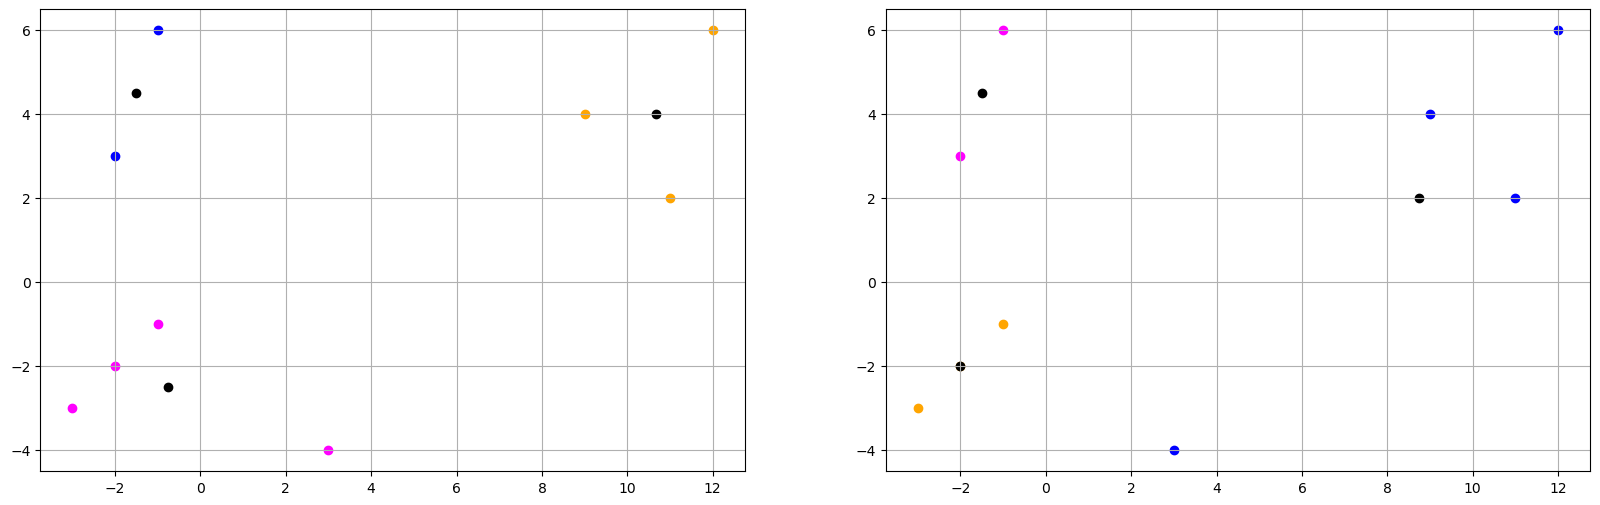

In [67]:
fig = plt.figure(figsize=(20, 6)) 

plt.subplot(121)
zero_x1 = list([x[0] for x in division1[0]])
zero_y1 = list([x[1] for x in division1[0]])

one_x1 = list([x[0] for x in division1[1]])
one_y1 = list([x[1] for x in division1[1]])

two_x1 = list([x[0] for x in division1[2]])
two_y1 = list([x[1] for x in division1[2]])

means_x1 = list([x[0] for x in fin_means1])
means_y1 = list([x[1] for x in fin_means1])

plt.scatter(zero_x1, zero_y1, color='orange')
plt.scatter(one_x1, one_y1, color='magenta')
plt.scatter(two_x1, two_y1, color='blue')
plt.scatter(means_x1, means_y1, color='black')
plt.grid()

plt.subplot(122)
zero_x2 = list([x[0] for x in division2[0]])
zero_y2 = list([x[1] for x in division2[0]])

one_x2 = list([x[0] for x in division2[1]])
one_y2 = list([x[1] for x in division2[1]])

two_x2 = list([x[0] for x in division2[2]])
two_y2 = list([x[1] for x in division2[2]])

means_x2 = list([x[0] for x in fin_means2])
means_y2 = list([x[1] for x in fin_means2])

plt.scatter(zero_x2, zero_y2, color='orange')
plt.scatter(one_x2, one_y2, color='magenta')
plt.scatter(two_x2, two_y2, color='blue')
plt.scatter(means_x2, means_y2, color='black')
plt.grid()

plt.show()

Как видно по графикам, два способа кластеризации привели к двум разным делениям на кластеры с различными средними.

Помимо K-means clustering, также существуют:

1) GAAC clustering: он воспринимает каждый вектор из набора как отдельный кластер; затем последовательно объединяет пары кластеров с ближайшими средними

2) Gaussian EM clustering: он использует метод максимизации матожидания: алгоритм начинается с выбора некоторых средних, исходных вероятностей и ковариационных матриц. Далее высчитываются вероятности принадлежности каждого вектора к каждому из кластеров, и затем с использованием метода максимального правдоподобия и этих вероятностей параметры кластера (среднее, вероятности принадлежности векторов, ковариационные матрицы) пересчитываются. Алгоритм повторяется до тех пор, пока вероятности не стабилизируются.

### Sentiment analysis 

Одна из задач NLP - это анализ эмоциональной окраски текста (например, для автоматического определения положителен или отрицателен отзыв на товар/фильм, для фильтрации комментариев в соцсетях и т.д.). Библиотека NLTK предлагает готовое решение для данной задачи - предобученная модель, которая принимает на вход отрывок текста и определяет его эмоциональную окраску. В результате работы метода polarity_scores мы получаем 4 значения: neg, neu, pos - вероятности того, что текст имеет орицательную, нейтральную или положительную эмоциональную окраску соответственно; эти параметры принимают значения от 0 до 1 и суммируются в единицу. Также есть 4-й параметр compound, который принимает значени от -1 до 1: чем отрицательнее compound, тем негативнее текст и наоборот.

В качестве примера проведем sentiment analysis для 9 предложений из nltk.book.

In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer
sents=[sent1, sent2, sent3, sent4, sent5, sent6, sent7, sent8, sent9]
sia = SentimentIntensityAnalyzer()
for x in sents:
    print(f"{' '.join(x)} --> {sia.polarity_scores(' '.join(x))}") 

Call me Ishmael . --> {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
The family of Dashwood had long been settled in Sussex . --> {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
In the beginning God created the heaven and the earth . --> {'neg': 0.0, 'neu': 0.486, 'pos': 0.514, 'compound': 0.7506}
Fellow - Citizens of the Senate and of the House of Representatives : --> {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
I have a problem with people PMing me to lol JOIN --> {'neg': 0.187, 'neu': 0.416, 'pos': 0.397, 'compound': 0.4648}
SCENE 1 : [ wind ] [ clop clop clop ] KING ARTHUR : Whoa there ! --> {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Pierre Vinken , 61 years old , will join the board as a nonexecutive director Nov. 29 . --> {'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'compound': 0.296}
25 SEXY MALE , seeks attrac older single lady , for discreet encounters . --> {'neg': 0.0, 'neu': 0.708, 'pos': 0.292, 'compound': 0.6289}
THE suburb of Saffron Park la

### Классификация

Задача классификации в определенной степени связана с задачей кластеризации. Классификация может использоваться в очень многих задачах NLP: от определения пола по имени человека до установления автора литературного произведения и определения темы новостей.

В nltk.classify есть несколько моделей машинного обучения, которые могут классифицировать тексты после предварительного обученния. Среди таких моделей: BinaryMaxentFeatureEncoding, MaxentClassifier, NaiveBayesClassifier, SklearnClassifier и др. Каждый из них имеет специфичную сигнатуру и лучше работает на разных радачах. Мы рассмотрим один из базовых классификаторов - NaiveBayesClassifier.

Такой классификатор принимает на вход размеченный датасет: список из пар вида (векторное представление текста, лейбл). Следовательно, нам потребуется функция, векторизующая любой текст по определенному алгоритму. На данном этапе мы уже сами придумаем эту функцию и пропишем алгоритм, выделив ключевые (по нашему мнению) характеристики текстов для определения их класса. 

Мы будем тренировать модель на датасете movie_reviews: в нем содержатся отзывы на фильмы и настроение этого отзыва (pos-positive/neg-negative). 

In [38]:
from nltk.corpus import movie_reviews
from string import punctuation 
from nltk.corpus import stopwords
import random
no_inf = stopwords.words('english')  

#Заметим, что в корпусе с отзывами сначала идут только отрицательные отзывы, а потом только положительные
#Значит, нам надо перемешать все отзывы, чтобы исключить влияние порядка на результат.

shuff_fileids=movie_reviews.fileids()
random.shuffle(shuff_fileids)
    
#Почистим отзывы от знаков препинания и неинформативных слов    
rev_no_punct = [w for w in movie_reviews.words() if not w in punctuation]
rev_no_stopwords=[w.lower() for w in rev_no_punct if not w in no_inf]

#В отдельный список поместим 1000 наиболее часто встречаемых слов в тексте
rev_most_common = list(nltk.FreqDist(rev_no_stopwords))[:1000]

#Создадим словарь из пар вида (айди отзыва, его настроение)
#Корпус довольно большой, и нам вполне хватит его половины, т.е. 1000 из 2000 отзывов
tagged_reviews=dict()
for fileid in shuff_fileids[:1000]:
    tagged_reviews[fileid]=fileid[:3]

In [39]:
#Напишем функцию, которая будет векторизовать отзывы: для каждого слова из rev_most_common она проверяет, есть ли данное
#слово в тексте отзыва; если есть, то по соответствующему ключу в словаре помещаем 1, иначе 0
#В результате каждый отзыв представляется в виде двоичного вектора длины 1000
def markuper(review): 
    result = dict()
    for word in rev_most_common:
        result[f'contains({word})'] = 1 if word in review else 0
    return result

In [40]:
#Создаем размеченный датасет: для каждого отзыва из выбранной половины создаем пару (векторизованный отзыв, лейбл), и кладем в список
#Эта функция работает довольно долго, но она работает :)
rev_markedup=[]
for fileid in tagged_reviews.keys():
    cur_rev_marked=markuper(movie_reviews.words(fileid))
    rev_markedup.append((cur_rev_marked, tagged_reviews[fileid]))

In [41]:
rev_markedup[0] #Посмотрим, как выглядит словарь для одного из текстов

({'contains(film)': 1,
  'contains(one)': 1,
  'contains(movie)': 1,
  'contains(like)': 1,
  'contains(even)': 1,
  'contains(good)': 1,
  'contains(time)': 1,
  'contains(story)': 0,
  'contains(would)': 1,
  'contains(much)': 1,
  'contains(character)': 0,
  'contains(also)': 0,
  'contains(get)': 0,
  'contains(two)': 1,
  'contains(well)': 0,
  'contains(characters)': 1,
  'contains(first)': 0,
  'contains(--)': 1,
  'contains(see)': 0,
  'contains(way)': 1,
  'contains(make)': 0,
  'contains(life)': 1,
  'contains(really)': 1,
  'contains(films)': 1,
  'contains(plot)': 1,
  'contains(little)': 0,
  'contains(people)': 1,
  'contains(could)': 0,
  'contains(scene)': 1,
  'contains(man)': 0,
  'contains(bad)': 0,
  'contains(never)': 1,
  'contains(best)': 1,
  'contains(new)': 0,
  'contains(scenes)': 0,
  'contains(many)': 0,
  'contains(director)': 0,
  'contains(know)': 0,
  'contains(movies)': 1,
  'contains(action)': 0,
  'contains(great)': 0,
  'contains(another)': 0,
  'co

In [48]:
#Делим размеченный датасет на обучающую и тренировочную выборку и тренируем модель
train_ds, test_ds = rev_markedup[200:], rev_markedup[:200]
classifier = nltk.NaiveBayesClassifier.train(train_ds)
#Оцениваем точность модели
print(f"Accuracy обученной модели равна {nltk.classify.accuracy(classifier, test_ds)}")

Accuracy обученной модели равна 0.775


Теперь возьмем 5 рандомных отзывов из той половины набора отзывов, которую мы вообще не использовали, предскажем их настроение с помощью модели и сверим с фактическим настроением.

In [51]:
rand_ids = random.sample(range(1000, 2000), 5)
for idx in rand_ids:
    binary_review=markuper(movie_reviews.words(shuff_fileids[idx]))
    res=classifier.classify(binary_review)
    print(f"Отзыв номер {idx} с айдишником {movie_reviews.fileids()[idx]}: модель предсказала {res}, на самом деле {movie_reviews.fileids()[idx][:3]}")

Отзыв номер 1916 с айдишником pos/cv304_28706.txt: модель предсказала pos, на самом деле pos
Отзыв номер 1898 с айдишником pos/cv674_10732.txt: модель предсказала pos, на самом деле pos
Отзыв номер 1691 с айдишником pos/cv932_13401.txt: модель предсказала neg, на самом деле pos
Отзыв номер 1793 с айдишником pos/cv673_24714.txt: модель предсказала pos, на самом деле pos
Отзыв номер 1717 с айдишником neg/cv585_23576.txt: модель предсказала pos, на самом деле neg


Итак, в данном докладе мы рассмотрели основной функционал библиотеки NLTK и разобрали базовые этапы обработки и анализа текста в NLP.

### Самая долгожданная глава доклада... 

![](https://poknok.art/uploads/posts/2022-10/1666944343_1-poknok-art-p-popugai-smotrit-v-zerkalo-foto-1.jpg)

![](https://sun9-77.userapi.com/impg/xlBeKSAHKJS-OtKkvE07e6uV_F83fRUWjHHtJQ/QkLJPNiZfDk.jpg?size=692x807&quality=95&sign=b314f52720068ffab0368d7aedc25e24&c_uniq_tag=NpIcKL_TSB3lPQvW7fnpXKOH0gfr6je_FitxJU0Zs-c&type=album)

![](https://pressa.tv/uploads/posts/2019-07/thumbs/1562054886_pressa_tv_memy-s-popugayami-37.jpg)

![](https://cs14.pikabu.ru/post_img/big/2021/09/29/10/1632932051177036610.jpg)

![](https://pbs.twimg.com/media/EXcjM1dWkAI0vrg.jpg)